<a href="https://colab.research.google.com/github/CodeVins/C-programming-/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import requests
import pandas as pd

# 인증키 및 기본 파라미터

serviceKey = 'uun2aJj2%2Betud4g42QxMyfPiNHjo6GgWZ%2BTbaBmuCcIU4L3FE%2BKAFN%2Ff6POBGp4LPtScZQkt%2BZ6UuFefhcf5aA%3D%3D'
numOfRows = 400
startDt = 20130101
endDt = 20131231
stnId = 108  # 서울

# ✅ 함수 정의
def set_url(key, numOfRows, startDt, endDt, stnId, ctype):
    base = "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList"
    url = (f"{base}?serviceKey={key}&pageNo=1&numOfRows={numOfRows}"
           f"&dataType={ctype}&dataCd=ASOS&dateCd=DAY"
           f"&startDt={startDt}&endDt={endDt}&stnIds={stnId}")
    return url

In [6]:
# URL 생성
url = set_url(serviceKey, numOfRows, startDt, endDt, stnId, "JSON")

# 요청 실행
response = requests.get(url)

# 응답 확인 및 JSON 파싱
if response.status_code == 200:
    data = response.json()
    items = data['response']['body']['items']['item']
    df = pd.DataFrame(items)
    print("✅ 데이터프레임 생성 완료")
else:
    print("❌ 요청 실패:", response.status_code)
    print(response.text[:300])


✅ 데이터프레임 생성 완료


In [7]:
# tm 컬럼을 datetime으로 되어 있어야 합니다
df['tm'] = pd.to_datetime(df['tm'])

# '월' 단위 컬럼 추가
df['month'] = df['tm'].dt.to_period('M')

# sumRn 숫자형 처리
df['sumRn'] = pd.to_numeric(df['sumRn'], errors='coerce').fillna(0)

# 월별 요약 집계
monthly_summary = df.groupby('month').agg(
    월강수합계=('sumRn', 'sum'),
    월평균강수=('sumRn', 'mean'),
    비온날수=('sumRn', lambda x: (x > 0).sum()),
    전체일수=('sumRn', 'count')
).reset_index()

# 비온 비율도 추가
monthly_summary['비온날비율(%)'] = (monthly_summary['비온날수'] / monthly_summary['전체일수']) * 100

# 미리보기
monthly_summary

monthly_summary.to_csv("서울 2013년 월별 강수량 데이터.csv", index=False, encoding='utf-8-sig')
print("✅ '서울 2013년 월별 강수량 데이터.csv' 저장 완료!")


✅ '서울 2013년 월별 강수량 데이터.csv' 저장 완료!


서울 2013년 월별 강수량 데이터는 서울 열린데이터 광장의 서울시 범죄 발생현황 통계에서 csv 파일을 다운받아 구글 코랩에 파일 업로드하여 사용하였습니다.

In [10]:
# 파일 인코딩 포함해서 불러오기
rain_df = pd.read_csv('/content/서울 2013년 월별 강수량 데이터.csv', encoding='utf-8')
crime_df = pd.read_csv('/content/서울 2013년 월별 강력범죄.csv', encoding='cp949')

# 컬럼명 확인
print("📁 강수량 데이터 컬럼:", rain_df.columns)
print("📁 범죄 데이터 컬럼:", crime_df.columns)

📁 강수량 데이터 컬럼: Index(['month', '월강수합계', '월평균강수', '비온날수', '전체일수', '비온날비율(%)'], dtype='object')
📁 범죄 데이터 컬럼: Index(['월', '서울 강력범죄 발생수'], dtype='object')


In [15]:
import pandas as pd

# CSV 읽기 (cp949 인코딩 사용)
crime_df = pd.read_csv('/content/서울 2013년 월별 강력범죄.csv', encoding='cp949')

# '월' 컬럼이 "2013. 01" ~ "2013. 12" 형식이므로, 그대로 datetime으로
crime_df['month'] = pd.to_datetime(crime_df['월'], format='%Y. %m').dt.to_period('M')

# 불필요한 '월' 컬럼 제거
crime_df = crime_df.drop(columns=['월'])

# 저장
crime_df.to_csv('서울_2013년_월별_강력범죄_전처리.csv', index=False, encoding='utf-8-sig')
print("✅ 전처리된 CSV 저장 완료! 'month' 기준 병합 가능 상태입니다.")


✅ 전처리된 CSV 저장 완료! 'month' 기준 병합 가능 상태입니다.


In [16]:
import pandas as pd

# 파일 경로에 맞게 수정하세요
rain_df = pd.read_csv('/content/서울 2013년 월별 강수량 데이터.csv', encoding='utf-8-sig')
crime_df = pd.read_csv('/content/서울_2013년_월별_강력범죄_전처리.csv', encoding='utf-8-sig')

# 'month' 컬럼을 Period 타입으로 맞춰줌
rain_df['month'] = pd.to_datetime(rain_df['month']).dt.to_period('M')
crime_df['month'] = pd.to_datetime(crime_df['month']).dt.to_period('M')

# 병합
merged_df = pd.merge(rain_df, crime_df, on='month', how='inner')

# 미리보기
print(merged_df)

# 저장
merged_df.to_csv('2013_서울_강수량_강력범죄_병합.csv', index=False, encoding='utf-8-sig')
print("✅ 병합된 CSV 저장 완료!")


      month  월강수합계      월평균강수  비온날수  전체일수   비온날비율(%)  서울 강력범죄 발생수
0   2013-01   22.1   0.712903     7    31  22.580645          396
1   2013-02   74.1   2.646429     8    28  28.571429          346
2   2013-03   27.3   0.880645     8    31  25.806452          444
3   2013-04   71.7   2.390000    15    30  50.000000          546
4   2013-05  132.0   4.258065    10    31  32.258065          558
5   2013-06   28.3   0.943333     9    30  30.000000          619
6   2013-07  676.2  21.812903    25    31  80.645161          649
7   2013-08  148.6   4.793548    12    31  38.709677          615
8   2013-09  138.5   4.616667     9    30  30.000000          547
9   2013-10   13.5   0.435484     4    31  12.903226          669
10  2013-11   46.8   1.560000    12    30  40.000000          415
11  2013-12   24.7   0.796774     9    31  29.032258          472
✅ 병합된 CSV 저장 완료!


<ipython-input-17-a3f7252010a3>:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


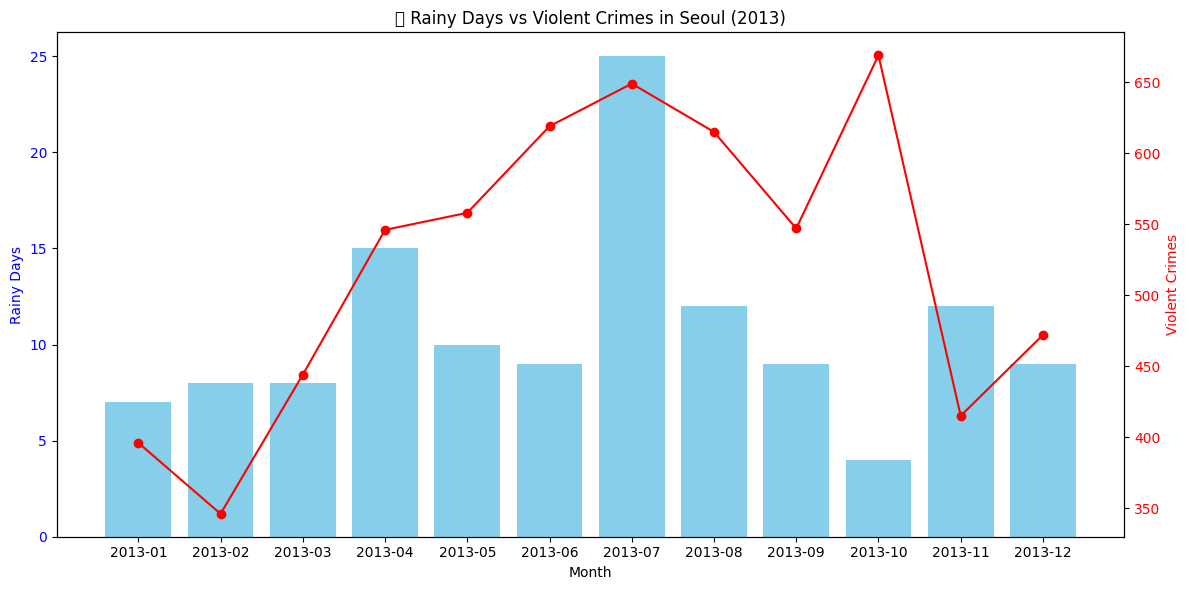

In [17]:
import matplotlib.pyplot as plt

# 데이터 준비
x = merged_df['month'].astype(str)
rain_days = merged_df['비온날수']
crime = merged_df['서울 강력범죄 발생수']

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# 비온 날 수 (막대)
ax1.bar(x, rain_days, color='skyblue', label='Rainy Days')
ax1.set_ylabel('Rainy Days', color='blue')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='blue')

# 강력범죄 수 (선)
ax2 = ax1.twinx()
ax2.plot(x, crime, color='red', marker='o', label='Violent Crimes')
ax2.set_ylabel('Violent Crimes', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 타이틀 및 레이아웃
plt.title("📊 Rainy Days vs Violent Crimes in Seoul (2013)")
fig.tight_layout()
plt.show()

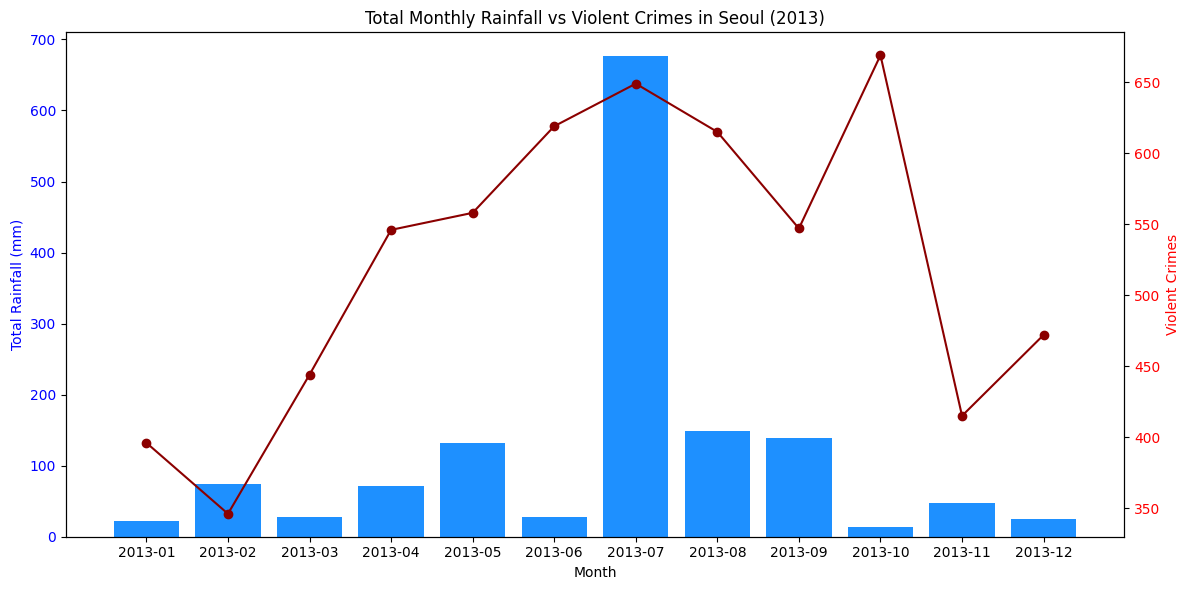

In [18]:
import matplotlib.pyplot as plt

# 데이터 준비
x = merged_df['month'].astype(str)
rain_amount = merged_df['월강수합계']
crime = merged_df['서울 강력범죄 발생수']

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# 강수량 - 막대그래프
ax1.bar(x, rain_amount, color='dodgerblue', label='Monthly Rainfall')
ax1.set_ylabel('Total Rainfall (mm)', color='blue')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='blue')

# 범죄 발생 수 - 선그래프
ax2 = ax1.twinx()
ax2.plot(x, crime, color='darkred', marker='o', label='Violent Crimes')
ax2.set_ylabel('Violent Crimes', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 제목 및 정리
plt.title('Total Monthly Rainfall vs Violent Crimes in Seoul (2013)')
fig.tight_layout()
plt.show()

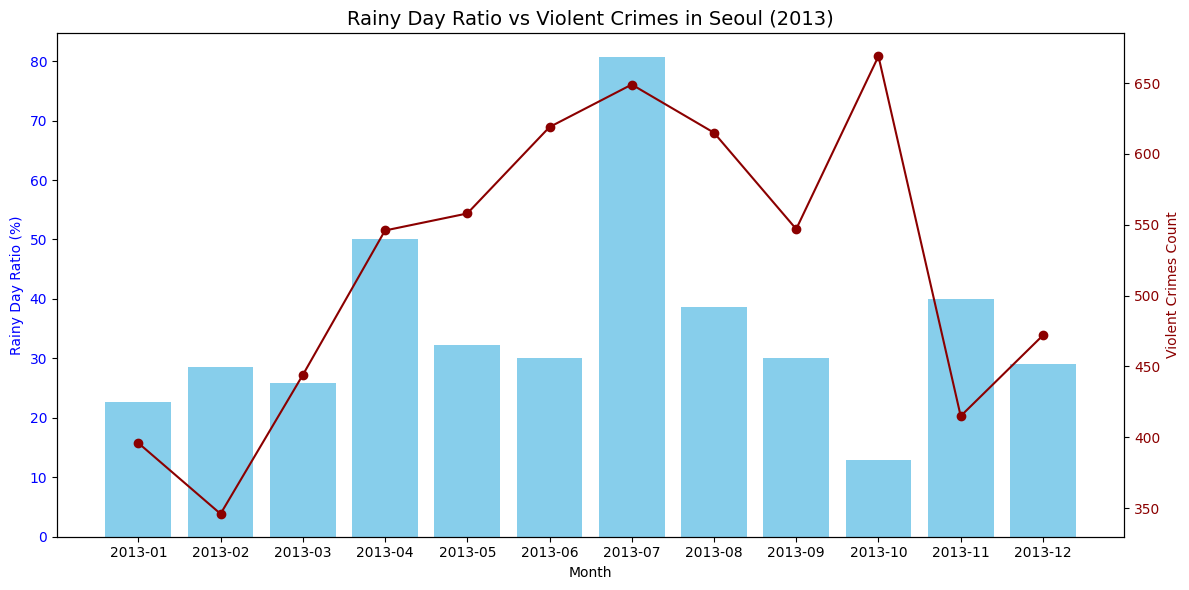

In [19]:
import matplotlib.pyplot as plt

# x축 월(문자열로 변환)
x = merged_df['month'].astype(str)
rain_ratio = merged_df['비온날비율(%)']
crime_count = merged_df['서울 강력범죄 발생수']

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# 비온날 비율 - 막대 그래프
ax1.bar(x, rain_ratio, color='skyblue', label='Rainy Day Ratio (%)')
ax1.set_ylabel('Rainy Day Ratio (%)', color='blue')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='blue')

# 강력범죄 발생 수 - 선 그래프
ax2 = ax1.twinx()
ax2.plot(x, crime_count, color='darkred', marker='o', label='Violent Crimes')
ax2.set_ylabel('Violent Crimes Count', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# 타이틀
plt.title('Rainy Day Ratio vs Violent Crimes in Seoul (2013)', fontsize=14)
fig.tight_layout()
plt.show()

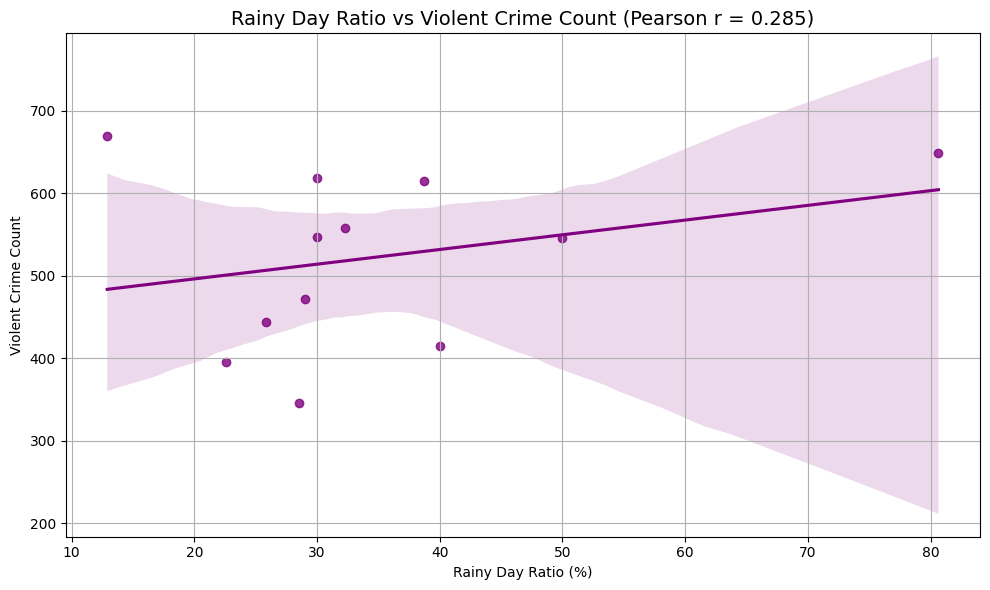

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 산점도 + 회귀선 (seaborn 활용)
sns.regplot(data=merged_df, x='비온날비율(%)', y='서울 강력범죄 발생수', color='purple')

# 상관계수 계산
corr, _ = stats.pearsonr(merged_df['비온날비율(%)'], merged_df['서울 강력범죄 발생수'])

# 타이틀 및 라벨
plt.title(f'Rainy Day Ratio vs Violent Crime Count (Pearson r = {corr:.3f})', fontsize=14)
plt.xlabel('Rainy Day Ratio (%)')
plt.ylabel('Violent Crime Count')
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()
